# Forschungsdaten des  Hamburger Zentrum für Sprachkorpora (HZSK)

<a id="0"></a>
## Inhalt

1. [Statistische Beschreibung des Datensatzes](#1)

2. [Univariate Plots](#2)

3. [Word Clouds](#3)



<a id="1"></a>
## 1. Statistische Beschreibung des Datensatzes

[Zurück zum Anfang](#0)

In [1]:
# Importieren der Bibliotheken
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:

# Erstellen des 1. DataFrames
data_hzsk = pd.read_csv(r'../../data/refined/clarin/hzsk/hzsk-records-20240620_refined.csv')

# Erstellen des 2. Dataframes (recordweise gruppiert)
# Kopie des Dataframes erstellen, record identifier durch alle Zeilen füllen

data_hzsk_grouped = data_hzsk.copy()
data_hzsk_grouped['record id'] = data_hzsk_grouped['record id'].ffill()  # record id auffüllen


# Gruppieren und joinen der Daten nach record identifier
data_hzsk_grouped = data_hzsk_grouped.groupby('record id').agg({
    'datestamp': 'first',  
    'subject': lambda x: '; '.join(x.dropna().unique()),  # Einzigartige Werte zusammenführen
    'identifier': lambda x: '; '.join(x.dropna().unique()),  
    'creator': lambda x: '; '.join(x.dropna().unique()),  
    'contributor': lambda x: '; '.join(x.dropna().unique()),  
    'type': lambda x: '; '.join(x.dropna().unique()),  
    'type - dcmi recommendation': lambda x: '; '.join(x.dropna().unique()),  
    'rights': lambda x: '; '.join(x.dropna().unique()),  
    'relation': lambda x: '; '.join(x.dropna().unique()),  
    'date': lambda x: '; '.join(x.dropna().unique()),  
    'description': lambda x: '; '.join(x.dropna().unique()),  
    'title': lambda x: '; '.join(x.dropna().unique()),  
    'language': lambda x: '; '.join(x.dropna().unique()),  
    'source': lambda x: '; '.join(x.dropna().unique()),  
    'publisher': lambda x: '; '.join(x.dropna().unique()),    
    'record id': lambda x: '; '.join(x.dropna().unique())  
}).reset_index(drop=True)

data_hzsk_grouped.fillna('NA', inplace=True)  # NaT durch NA ersetzen

# Transformieren von 'datestamp' und 'date' zu datetime objects
data_hzsk_grouped[['date', 'datestamp']] = data_hzsk_grouped[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')
data_hzsk[['date', 'datestamp']] = data_hzsk[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')

data_hzsk_grouped.replace('', 'NA', inplace=True)  # leere Werte durch NA ersetzen




                        column count   type
4                  contributor  1761  valid
3                      creator  3394  valid
9                         date  3388  valid
0                    datestamp  3394  valid
10                 description  3393  valid
2                   identifier  3394  valid
12                    language  2428  valid
14                   publisher   272  valid
15                   record id  3394  valid
8                     relation  3375  valid
7                       rights  3394  valid
13                      source   371  valid
1                      subject  1906  valid
11                       title  3393  valid
5                         type  3394  valid
6   type - dcmi recommendation  3394  valid


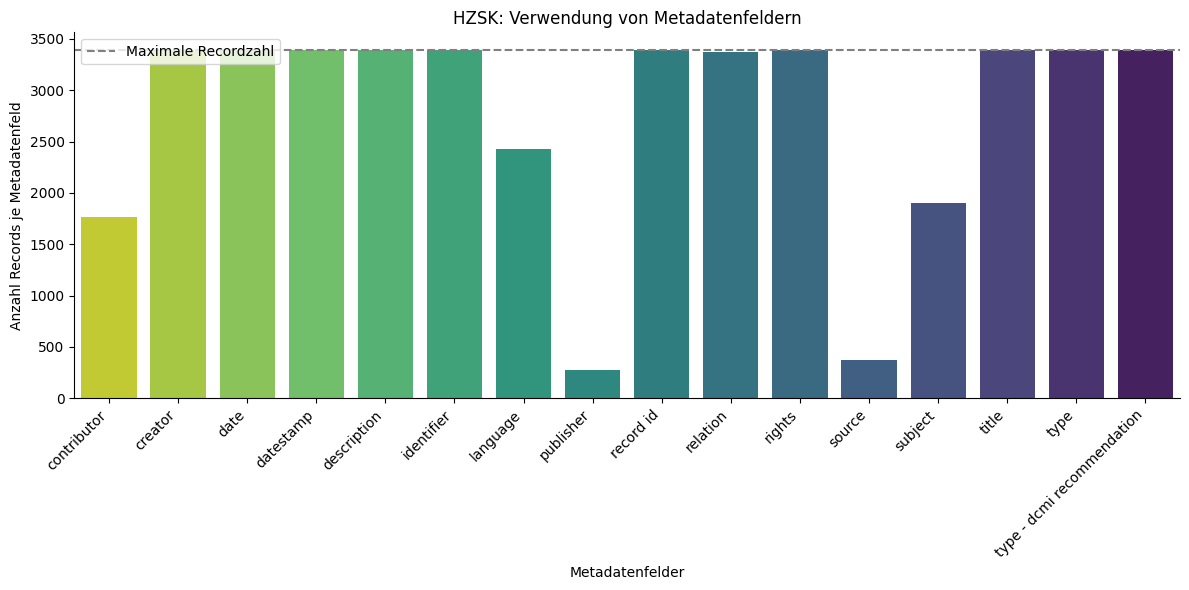

In [3]:


# Erstellen eines DataFrames zur Zusammenfassung der gültigen Einträge für jedes Metadatenfeld
metadata_usage = pd.DataFrame(columns=['column', 'count', 'type'])


for column in data_hzsk_grouped.columns:
    # Zählen gültiger Werte
    valid_count = data_hzsk_grouped[column][data_hzsk_grouped[column] != 'NA'].count()

    # Erstellen eines temporären DataFrames
    valid_row = pd.DataFrame({'column': [column], 'count': [valid_count], 'type': ['valid']})

    # Verkettung der Zeilen
    metadata_usage = pd.concat([metadata_usage, valid_row], ignore_index=True)

# Sortieren der DataFrame nach der 'column' Spalte
metadata_usage = metadata_usage.sort_values(by='column')

# Ausgabe zur Prüfung von metadata_usage
print(metadata_usage)

# Berechnen der maximalen Anzahl der Records mit 'record id'
max_record_count = data_hzsk_grouped['record id'].nunique()

# Erstellen des Plots mit sortierten Daten
sns.catplot(data=metadata_usage, x='column', y='count', kind='bar', height=6, aspect=2, hue='column', palette='viridis_r')

# Zeichnen einer horizontalen Linie bei der maximalen Datensatzanzahl
plt.axhline(y=max_record_count, color='grey', linestyle='--', label='Maximale Recordzahl')

# Plot-Beschriftungen und Titel anpassen
plt.xticks(rotation=45, ha='right')
plt.xlabel('Metadatenfelder')
plt.ylabel('Anzahl Records je Metadatenfeld')
plt.title('HZSK: Verwendung von Metadatenfeldern')
plt.legend()
plt.tight_layout()
plt.savefig("HZSK_Verwendung_von_Metadatenfeldern.png", dpi=600)
plt.show()


In [4]:
data_hzsk_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3394 entries, 0 to 3393
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datestamp                   3394 non-null   datetime64[ns, UTC]
 1   subject                     3394 non-null   object             
 2   identifier                  3394 non-null   object             
 3   creator                     3394 non-null   object             
 4   contributor                 3394 non-null   object             
 5   type                        3394 non-null   object             
 6   type - dcmi recommendation  3394 non-null   object             
 7   rights                      3394 non-null   object             
 8   relation                    3394 non-null   object             
 9   date                        3388 non-null   datetime64[ns, UTC]
 10  description                 3394 non-null   object          

In [5]:
data_hzsk_grouped.head()

,datestamp,subject,identifier,creator,contributor,type,type - dcmi recommendation,rights,relation,date,description,title,language,source,publisher,record id
0,2020-07-03 13:17:23+00:00,3d model; 3d scan; palmea raphia-spec; herbari...,https://zenodo.org/record/1000; 10.25592/uhhfd...,"Meuser, John; Schwenn, Fabian; Dominic Korte; ...",NA,other; dataset,other; dataset,OA; CC BY NC SA,doi:10.25592/uhhfdm.991,2020-05-27 00:00:00+00:00,3D Model of Palmea Raphia-spec,3D Model of Palmea Raphia-spec,deu,NA,NA,oai:fdr.uni-hamburg.de:1000
1,2022-05-03 08:50:21+00:00,land degradation; sustainable intensification;...,https://zenodo.org/record/10001; 10.25592/uhhf...,"Lüdeling, Eike","Lozán, José L.; Breckle, Siegmar-W.; Graßl, Ha...",book part; section,text,OA; CC BY,info:eu-repo/semantics/altIdentifier/doi/10.25...,2021-12-01 00:00:00+00:00,Der Landdegradierung kann mit verschiedenen Ma...,Maßnahmen gegen Landdegradierung,deu,NA,"Verlag Wissenschaftliche Auswertungen, GEO Mag...",oai:fdr.uni-hamburg.de:10001
2,2022-05-03 08:50:34+00:00,mangroves; coastal vegetation; climate change-...,https://zenodo.org/record/10003; 10.25592/uhhf...,"Zimmer, Martin","Lozán, José L.; Breckle, Siegmar-W.; Graßl, Ha...",book part; section,text,OA; CC BY,info:eu-repo/semantics/altIdentifier/doi/10.25...,2021-12-01 00:00:00+00:00,Der Schutz von Mangroven und Küstenvegetation ...,Der Schutz von Mangroven und Küstenvegetation ...,deu,NA,"Verlag Wissenschaftliche Auswertungen, GEO Mag...",oai:fdr.uni-hamburg.de:10003
3,2022-05-03 08:50:16+00:00,carbon storage; climate engineering; irrigated...,https://zenodo.org/record/10005; 10.25592/uhhf...,"Branch, Oliver; Wulfmeyer,Volker","Lozán, José L.; Breckle, Siegmar-W.; Graßl, Ha...",book part; section,text,OA; CC BY,info:eu-repo/semantics/altIdentifier/doi/10.25...,2021-12-01 00:00:00+00:00,Weltweit gibt es bis zu 1 Milliarde Hektar küs...,Kohlenstoffspeicherung und regionales Climate ...,deu,NA,"Verlag Wissenschaftliche Auswertungen, GEO Mag...",oai:fdr.uni-hamburg.de:10005
4,2022-05-03 08:50:17+00:00,bioenergy; climate protection; world nutrition...,https://zenodo.org/record/10007; 10.25592/uhhf...,"Fehrenbach, Horst","Lozán, José L.; Breckle, Siegmar-W.; Graßl, Ha...",book part; section,text,OA; CC BY,info:eu-repo/semantics/altIdentifier/doi/10.25...,2021-12-01 00:00:00+00:00,Der Beitrag beleuchtet die Rolle der Bioenergi...,Potentiale von Bioenergie für den Klimaschutz ...,deu,NA,"Verlag Wissenschaftliche Auswertungen, GEO Mag...",oai:fdr.uni-hamburg.de:10007


In [6]:
'Zeilenweiser Dataframe: Info zu Spalten und Datentypen'
data_hzsk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21999 entries, 0 to 21998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datestamp                   3394 non-null   datetime64[ns, UTC]
 1   subject                     15343 non-null  object             
 2   identifier                  10182 non-null  object             
 3   creator                     8240 non-null   object             
 4   contributor                 6883 non-null   object             
 5   type                        6649 non-null   object             
 6   type - dcmi recommendation  6648 non-null   object             
 7   rights                      5135 non-null   object             
 8   relation                    4436 non-null   object             
 9   date                        3394 non-null   datetime64[ns, UTC]
 10  description                 3393 non-null   object        

In [7]:
'Zeilenweiser Dataframe: Erste 5 Zeilen'
data_hzsk.head(15)

,datestamp,subject,identifier,creator,contributor,type,type - dcmi recommendation,rights,relation,date,description,title,language,source,publisher,record - header - setSpec,record id
0,2021-05-20 21:26:13+00:00,dfg-ha2323-14-1,https://zenodo.org/record/1212,"Engelkes, Karolin",NaN,other,other,Restricted Access,doi:10.1002/ece3.6784,2020-07-13 00:00:00+00:00,Species: Discoglossus montalentii Collection n...,"Discoglossus montalentii ZSM 1299/2006, unstai...",eng,NaN,NaN,user-uhh,oai:fdr.uni-hamburg.de:1212
1,NaT,387723284,10.25592/uhhfdm.1212,"Haas, Alexander",NaN,dataset,dataset,NaN,doi:10.25592/uhhfdm.1211,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,discoglossus,oai:fdr.uni-hamburg.de:1212,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,montalentii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,anura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaT,frog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaT,amphibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaT,computed tomography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaT,ct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaT,pectoral girdle morphometrics project,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
'Zeilenweiser Dataframe: Statistische Kennzahlen'
data_hzsk.describe()

,datestamp,subject,identifier,creator,contributor,type,type - dcmi recommendation,rights,relation,date,description,title,language,source,publisher,record - header - setSpec,record id
count,3394,15343,10182,8240,6883,6649,6648,5135,4436,3394,3393,3393,2428,371,272,3861,3394
unique,NaN,4235,10182,1584,1641,23,6,14,3724,NaN,3154,3088,34,346,9,21,3394
top,NaN,csmc,https://zenodo.org/record/1212,NCAC/RDD,"Lozán, José L.",other,other,OA,doi:10.1002/ece3.6784,NaN,Screencast eines interaktiv-partizipativen Dok...,Front Matter,mnk,Comparative Oriental Manuscript Studies Bullet...,"Verlag Wissenschaftliche Auswertungen, GEO Mag...",user-uhh,oai:fdr.uni-hamburg.de:1212
freq,NaN,282,1,1082,247,2536,2536,1748,69,NaN,19,16,959,5,261,2320,1
mean,2022-10-19 20:27:47.802887680+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-02 18:52:48.446670336+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2019-07-01 13:38:19+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2021-05-20 21:24:42.500000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-27 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2023-08-04 06:44:38+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-18 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2024-05-06 09:27:23.750000128+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-24 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024-06-19 13:33:49+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
'Recordweiser Dataframe: Info zu Spalten und Datentypen'
data_hzsk_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3394 entries, 0 to 3393
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datestamp                   3394 non-null   datetime64[ns, UTC]
 1   subject                     3394 non-null   object             
 2   identifier                  3394 non-null   object             
 3   creator                     3394 non-null   object             
 4   contributor                 3394 non-null   object             
 5   type                        3394 non-null   object             
 6   type - dcmi recommendation  3394 non-null   object             
 7   rights                      3394 non-null   object             
 8   relation                    3394 non-null   object             
 9   date                        3388 non-null   datetime64[ns, UTC]
 10  description                 3394 non-null   object          

In [10]:
'Recordweiser Dataframe: Erste 5 Zeilen'
data_hzsk_grouped.head()


,datestamp,subject,identifier,creator,contributor,type,type - dcmi recommendation,rights,relation,date,description,title,language,source,publisher,record id
0,2020-07-03 13:17:23+00:00,3d model; 3d scan; palmea raphia-spec; herbari...,https://zenodo.org/record/1000; 10.25592/uhhfd...,"Meuser, John; Schwenn, Fabian; Dominic Korte; ...",NA,other; dataset,other; dataset,OA; CC BY NC SA,doi:10.25592/uhhfdm.991,2020-05-27 00:00:00+00:00,3D Model of Palmea Raphia-spec,3D Model of Palmea Raphia-spec,deu,NA,NA,oai:fdr.uni-hamburg.de:1000
1,2022-05-03 08:50:21+00:00,land degradation; sustainable intensification;...,https://zenodo.org/record/10001; 10.25592/uhhf...,"Lüdeling, Eike","Lozán, José L.; Breckle, Siegmar-W.; Graßl, Ha...",book part; section,text,OA; CC BY,info:eu-repo/semantics/altIdentifier/doi/10.25...,2021-12-01 00:00:00+00:00,Der Landdegradierung kann mit verschiedenen Ma...,Maßnahmen gegen Landdegradierung,deu,NA,"Verlag Wissenschaftliche Auswertungen, GEO Mag...",oai:fdr.uni-hamburg.de:10001
2,2022-05-03 08:50:34+00:00,mangroves; coastal vegetation; climate change-...,https://zenodo.org/record/10003; 10.25592/uhhf...,"Zimmer, Martin","Lozán, José L.; Breckle, Siegmar-W.; Graßl, Ha...",book part; section,text,OA; CC BY,info:eu-repo/semantics/altIdentifier/doi/10.25...,2021-12-01 00:00:00+00:00,Der Schutz von Mangroven und Küstenvegetation ...,Der Schutz von Mangroven und Küstenvegetation ...,deu,NA,"Verlag Wissenschaftliche Auswertungen, GEO Mag...",oai:fdr.uni-hamburg.de:10003
3,2022-05-03 08:50:16+00:00,carbon storage; climate engineering; irrigated...,https://zenodo.org/record/10005; 10.25592/uhhf...,"Branch, Oliver; Wulfmeyer,Volker","Lozán, José L.; Breckle, Siegmar-W.; Graßl, Ha...",book part; section,text,OA; CC BY,info:eu-repo/semantics/altIdentifier/doi/10.25...,2021-12-01 00:00:00+00:00,Weltweit gibt es bis zu 1 Milliarde Hektar küs...,Kohlenstoffspeicherung und regionales Climate ...,deu,NA,"Verlag Wissenschaftliche Auswertungen, GEO Mag...",oai:fdr.uni-hamburg.de:10005
4,2022-05-03 08:50:17+00:00,bioenergy; climate protection; world nutrition...,https://zenodo.org/record/10007; 10.25592/uhhf...,"Fehrenbach, Horst","Lozán, José L.; Breckle, Siegmar-W.; Graßl, Ha...",book part; section,text,OA; CC BY,info:eu-repo/semantics/altIdentifier/doi/10.25...,2021-12-01 00:00:00+00:00,Der Beitrag beleuchtet die Rolle der Bioenergi...,Potentiale von Bioenergie für den Klimaschutz ...,deu,NA,"Verlag Wissenschaftliche Auswertungen, GEO Mag...",oai:fdr.uni-hamburg.de:10007


In [11]:
'Recordweiser Dataframe: Statistische Kennzahlen'
data_hzsk_grouped.describe()

,datestamp,subject,identifier,creator,contributor,type,type - dcmi recommendation,rights,relation,date,description,title,language,source,publisher,record id
count,3394,3394,3394,3394,3394,3394,3394,3394,3394,3388,3394,3394,3394,3394,3394,3394
unique,NaN,1330,3394,1035,945,20,6,15,3092,NaN,3155,3089,35,347,10,3394
top,NaN,NA,https://zenodo.org/record/1000; 10.25592/uhhfd...,NCAC/RDD,NA,other; dataset,other; dataset,OA; CC BY,NA,NaN,Screencast eines interaktiv-partizipativen Dok...,Front Matter,NA,NA,NA,oai:fdr.uni-hamburg.de:1000
freq,NaN,1488,1,1082,1633,2062,2062,1478,19,NaN,19,16,966,3023,3122,1
mean,2022-10-19 20:27:47.802887680+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-01 22:09:54.128689664+00:00,NaN,NaN,NaN,NaN,NaN,NaN
min,2019-07-01 13:38:19+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
25%,2021-05-20 21:24:42.500000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-27 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
50%,2023-08-04 06:44:38+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-19 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
75%,2024-05-06 09:27:23.750000128+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-24 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
max,2024-06-19 13:33:49+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
'Verwendete Farbpalette'

viridis_palette = sns.color_palette("viridis_r", 12)
viridis_hex = viridis_palette.as_hex()
print(viridis_hex)
sns.color_palette('viridis_r', 12)


['#cde11d', '#98d83e', '#67cc5c', '#40bd72', '#25ac82', '#1f998a', '#24878e', '#2b748e', '#34618d', '#3d4d8a', '#453581', '#481c6e']


[(0.804182, 0.882046, 0.114965),
 (0.595839, 0.848717, 0.243329),
 (0.404001, 0.800275, 0.362552),
 (0.252899, 0.742211, 0.448284),
 (0.146616, 0.67305, 0.508936),
 (0.120092, 0.600104, 0.54253),
 (0.140536, 0.530132, 0.555659),
 (0.169646, 0.456262, 0.55803),
 (0.203063, 0.379716, 0.553925),
 (0.239346, 0.300855, 0.540844),
 (0.271828, 0.209303, 0.504434),
 (0.283091, 0.110553, 0.431554)]

<a id="2"></a>
## 2. Univariate Plots

[Zurück zum Anfang](#0)



### Publikation von Forschungsdaten im Zeitverlauf
[Zurück zum Anfang](#0)

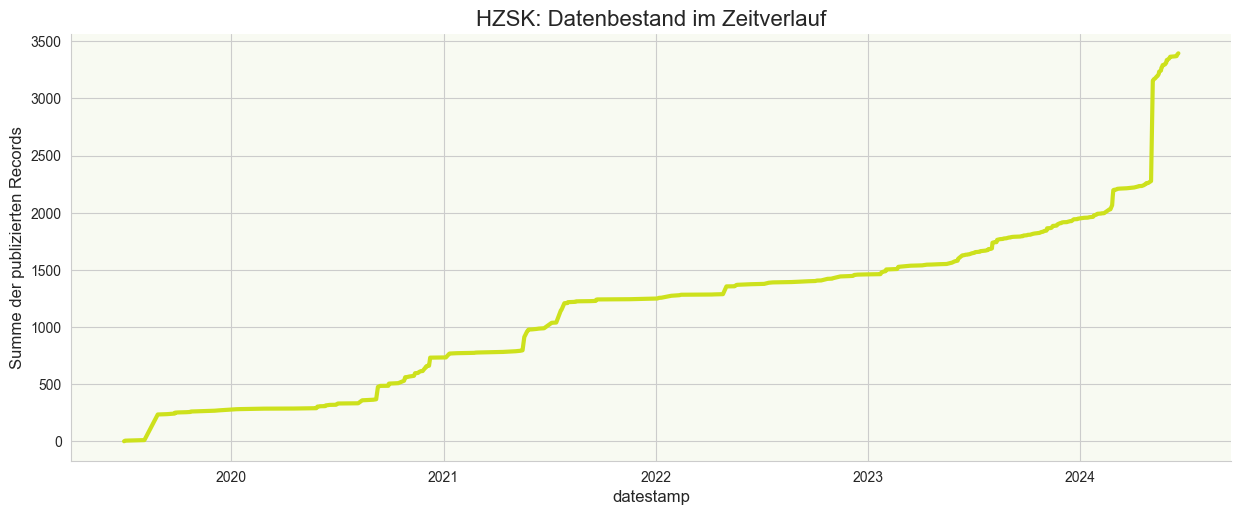

frühster Datestamp: 2019-07-01 ; spätester Datestamp: 2024-06-19


In [13]:
daily_counts = data_hzsk.groupby(data_hzsk['datestamp'].dt.date).size().reset_index(name='count')# Gruppieren und Zählen der Records nach Datestamp
daily_counts['cumulative_count'] = daily_counts['count'].cumsum() # Berechnen der kumulativen Summe


sns.set_style('whitegrid', {'axes.facecolor':'#f8faf2', 'figure.facecolor': 'white' }) # Style des Plots anpassen

# Plot der kumulativen Summe der Records über die Zeit
sns.relplot(daily_counts, x='datestamp', y='cumulative_count', kind='line', aspect=2.5, errorbar = None, color='#cde11d', linewidth=3)


plt.title('HZSK: Datenbestand im Zeitverlauf', fontsize=16)
plt.xlabel('datestamp', fontsize=12)
plt.ylabel('Summe der publizierten Records', fontsize=12)
# plt.xticks(rotation=45) 
plt.savefig("HZSK_datestamp_line_cum.png", dpi=600, bbox_inches='tight')
plt.show()

print('frühster Datestamp:', data_hzsk['datestamp'].min().date(), '; spätester Datestamp:', data_hzsk['datestamp'].max().date())


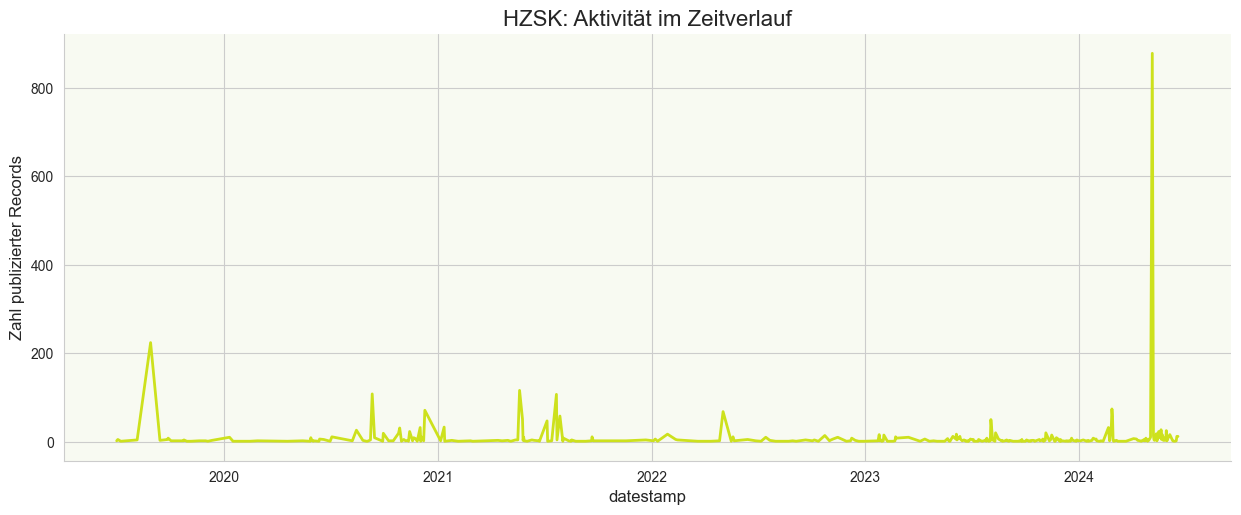

frühster Datestamp: 2019-07-01 ; spätester Datestamp: 2024-06-19


In [14]:
daily_counts = data_hzsk.groupby(data_hzsk['datestamp'].dt.date).size().reset_index(name='count') # Gruppieren und Zählen der Records nach Datum
daily_counts['cumulative_count'] = daily_counts['count'].cumsum() # Berechnen der kumulativen Summe

sns.set_style('whitegrid', {'axes.facecolor':'#f8faf2', 'figure.facecolor': 'white' }) # Style des Plots anpassen

sns.relplot(daily_counts, x='datestamp', y='count', kind='line', color='#cde11d', aspect=2.5, linewidth=2) 

plt.title('HZSK: Aktivität im Zeitverlauf', fontsize=16)
plt.xlabel('datestamp', fontsize=12)
plt.ylabel('Zahl publizierter Records', fontsize=12)
plt.savefig("HZSK_datestamp_line.png", dpi=600, bbox_inches='tight')
plt.show()
print('frühster Datestamp:', data_hzsk['datestamp'].min().date(), '; spätester Datestamp:', data_hzsk['datestamp'].max().date())

### Entstehungszeit der Ressourcen

[Zurück zum Anfang](#0)

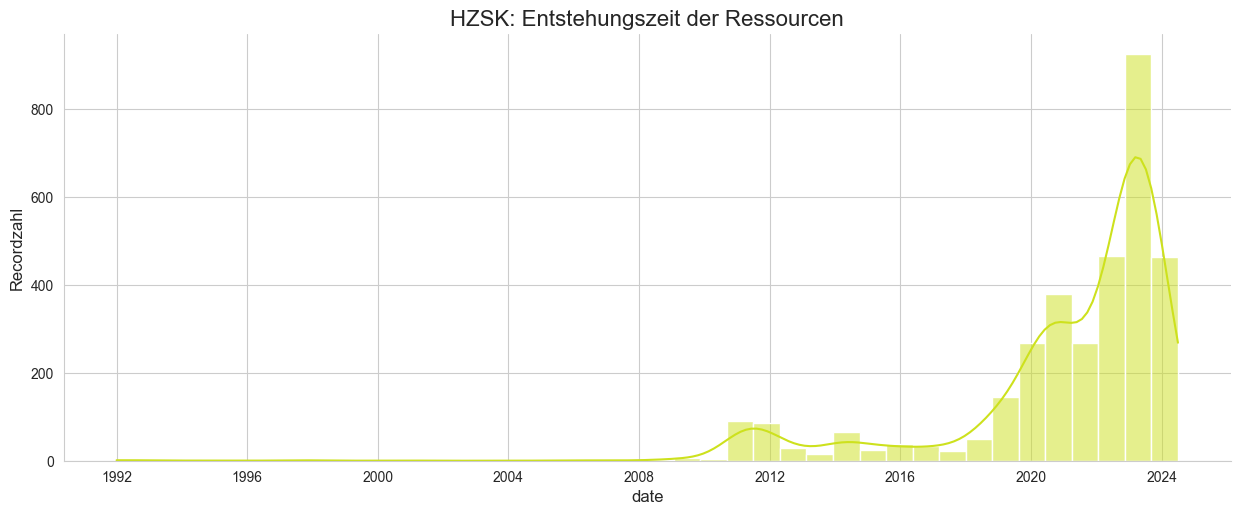

frühstes Datum: 1992-01-01 ; spätestes Datum: 2024-07-01


In [15]:

sns.set_style('whitegrid')
sns.displot(data_hzsk_grouped, x='date', bins=40, kde=True, color = '#cde11d', aspect=2.5) # Erscheinungszeitpunkt der Forschungsdaten anhand von 'date' in absolten Zahlen

#plt.xticks(rotation=45)
plt.title('HZSK: Entstehungszeit der Ressourcen', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('Recordzahl', fontsize=12)
plt.savefig("HZSK_date_hist.png", dpi=600, bbox_inches='tight')
plt.show()
print('frühstes Datum:', data_hzsk['date'].min().date(), '; spätestes Datum:', data_hzsk['date'].max().date())



### Sprachverteilung

[Zurück zum Anfang](#0)

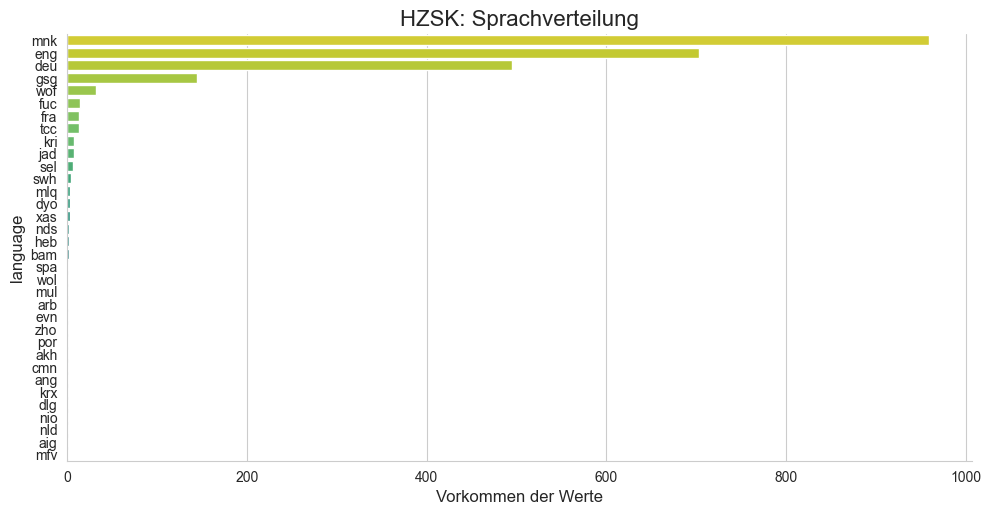

In [16]:
'Catplot: Verteilung der Sprachen'

# Reihenfolge der Werte festlegen
order = data_hzsk['language'].value_counts().index 
# Konvertieren der Daten in kategorische Variablen
data_hzsk['language'] = pd.Categorical(data_hzsk['language'], categories=order, ordered=True)

sns.catplot(data_hzsk, y = 'language', kind = 'count', aspect = 2, hue = 'language', palette = 'viridis_r', legend=False)

plt.title('HZSK: Sprachverteilung', fontsize=16)
plt.ylabel('language', fontsize=12)#
plt.xlabel('Vorkommen der Werte', fontsize=12)
plt.show()

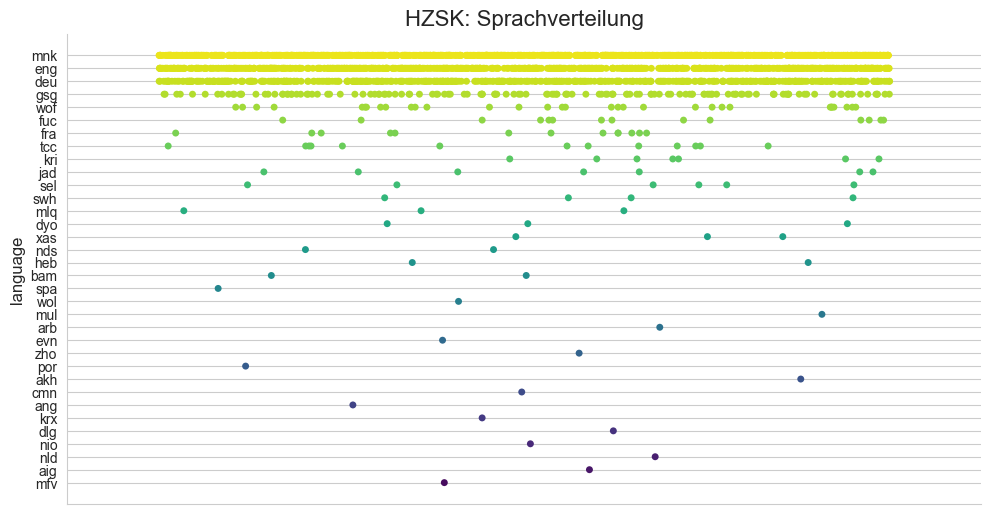

In [17]:
'Scatterplot: Verteilung der Sprachen'

# Reihenfolge der Werte festlegen
order = data_hzsk['language'].value_counts().index
# Konvertieren der Daten in kategorische Variablen
data_hzsk['language'] = pd.Categorical(data_hzsk['language'], categories=order, ordered=True)


sns.catplot(data_hzsk, y = 'language', aspect = 2, hue = 'language', palette="viridis_r", jitter=0.4, legend=False) # Verteilung mit erhöhtem Jitter

plt.title('HZSK: Sprachverteilung', fontsize=16)
plt.ylabel('language', fontsize=12)
plt.savefig("HZSK_language_scatter.png", dpi=600, bbox_inches='tight')
plt.show()


### Verteilung der Publisher

[Zurück zum Anfang](#0)

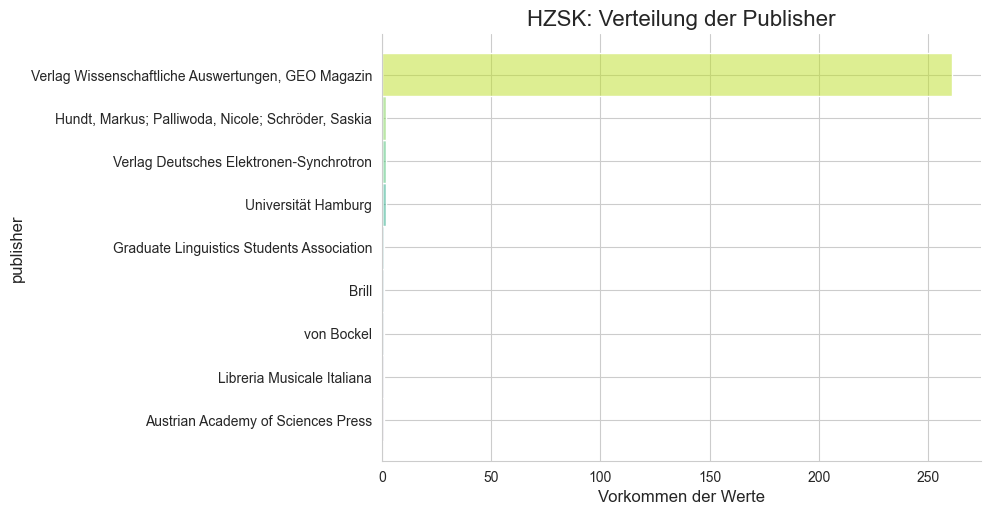

In [18]:
'Displot: Verteilung der Publisher'

# Reihenfolge der Werte festlegen
order = data_hzsk['publisher'].value_counts().index 
# Konvertieren der Daten in kategorische Variablen
data_hzsk['publisher'] = pd.Categorical(data_hzsk['publisher'], categories=order, ordered=True)


sns.set_style('whitegrid')
sns.displot(data_hzsk, y = 'publisher', aspect = 2, hue='publisher', palette="viridis_r", legend=False)



plt.title('HZSK: Verteilung der Publisher', fontsize=16)
plt.xlabel('Vorkommen der Werte', fontsize=12)
plt.ylabel('publisher', fontsize=12)
plt.show()

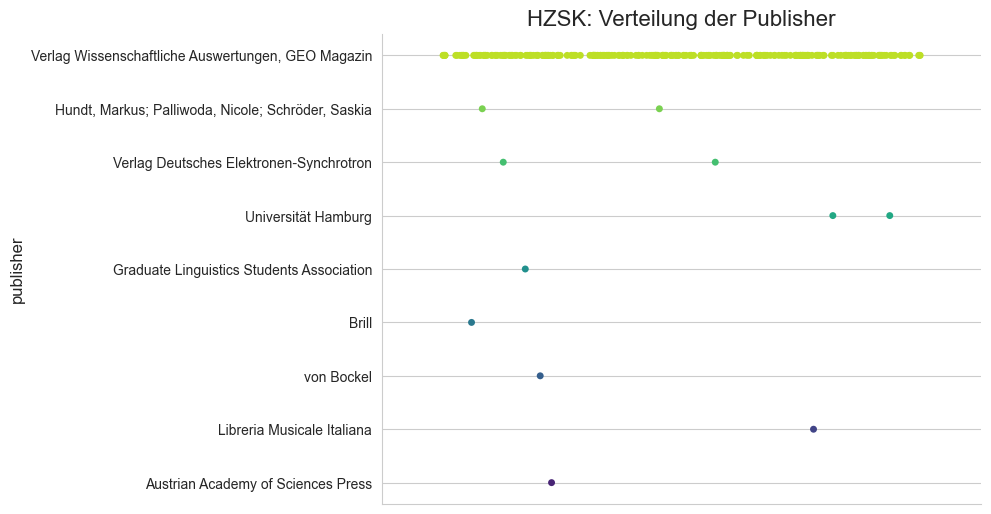

In [37]:
'Scatterplot: Verteilung der Publisher'

# Reihenfolge der Werte festlegen
order = data_hzsk['publisher'].value_counts().index 
# Konvertieren der Daten in kategorische Variablen
data_hzsk['publisher'] = pd.Categorical(data_hzsk['publisher'], categories=order, ordered=True)


sns.set_style('whitegrid')
sns.catplot(data_hzsk, y = 'publisher', aspect = 2, hue='publisher', palette="viridis_r", jitter=0.4, legend=False) # Verteilung der Publisher mit erhöhtem Jitter



plt.title('HZSK: Verteilung der Publisher', fontsize=16)
plt.ylabel('publisher', fontsize=12)
plt.savefig("HZSK_publisher_scatter.png", dpi=600, bbox_inches='tight')
plt.show()


### Verteilung der Lizenzangaben

[Zurück zum Anfang](#0)

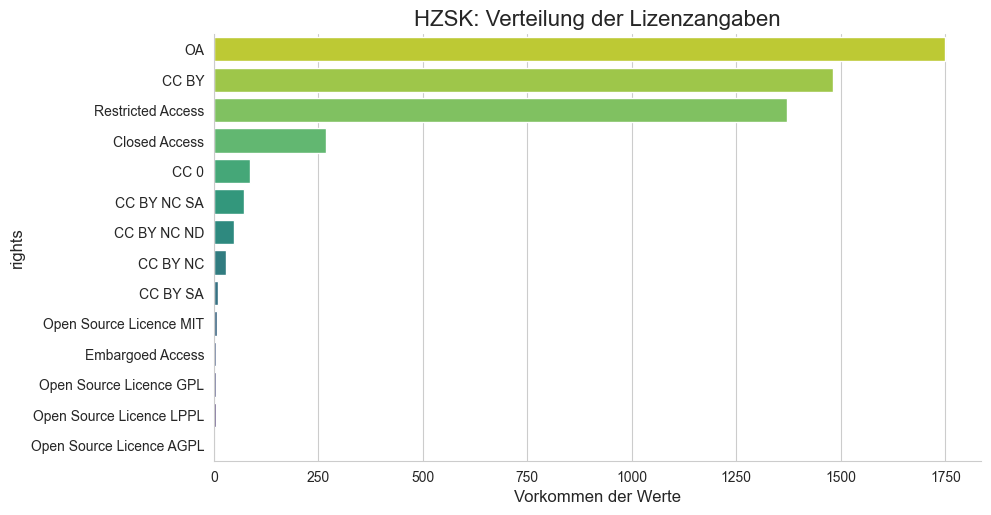

In [20]:
'Catplot: Verteilung der Lizenzangaben'

order = data_hzsk['rights'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_hzsk['rights'] = pd.Categorical(data_hzsk['rights'], categories=order, ordered=True)


sns.catplot(data_hzsk, y = 'rights', kind='count', aspect = 2, hue = 'rights', palette="viridis_r", legend=False)

plt.title('HZSK: Verteilung der Lizenzangaben', fontsize=16)
plt.xlabel('Vorkommen der Werte', fontsize=12)
plt.ylabel('rights', fontsize=12)
plt.show()

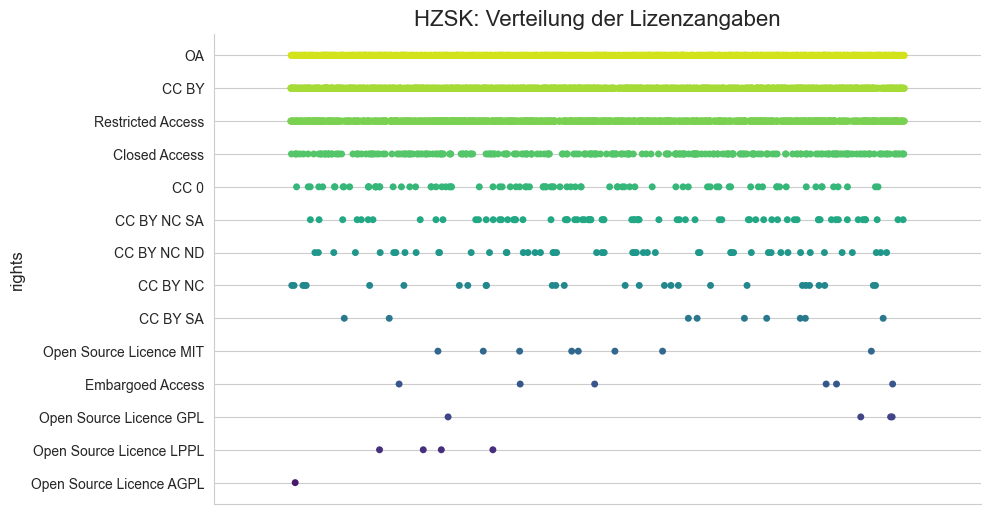

In [36]:
'Scatterplot: Verteilung der Lizenzangaben'

order = data_hzsk['rights'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_hzsk['rights'] = pd.Categorical(data_hzsk['rights'], categories=order, ordered=True)


sns.catplot(data_hzsk, y = 'rights', aspect = 2, hue = 'rights', palette="viridis_r", jitter=0.4,legend=False)

plt.title('HZSK: Verteilung der Lizenzangaben', fontsize=16)
plt.ylabel('rights', fontsize=12)
plt.savefig("HZSK_rights_scatter.png", dpi=600, bbox_inches='tight')
plt.show()


### Verteilung des Ressourcentyps

[Zurück zum Anfang](#0)

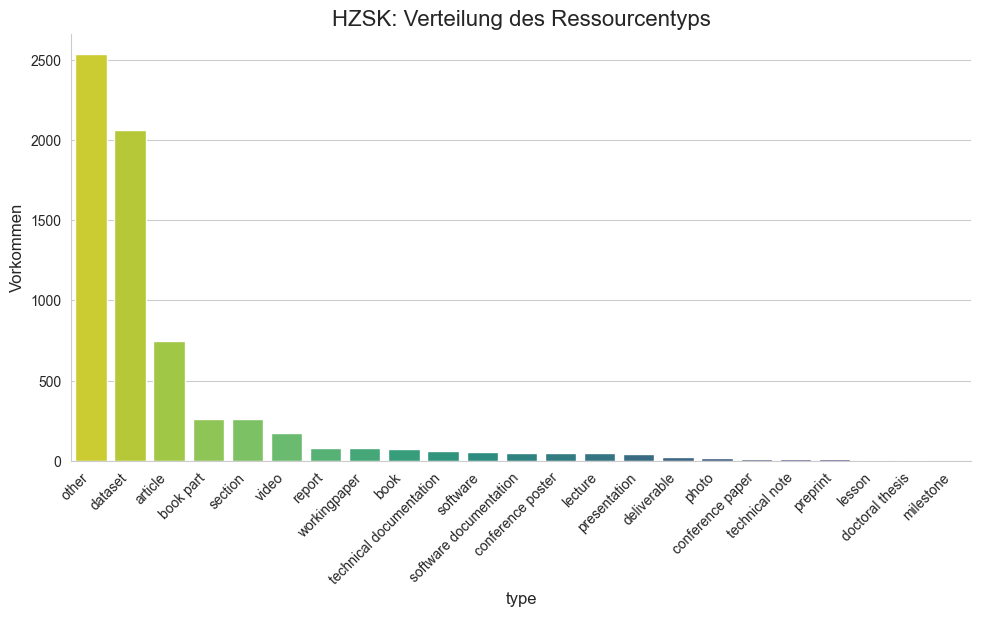

In [22]:
'Verteilung des Ressourcentyps wie vom HZSK angegeben'

# Reihenfolge der Werte festlegen
order_type = data_hzsk['type'].value_counts().index
# Konvertieren der Daten in kategorische Variablen
data_hzsk['type'] = pd.Categorical(data_hzsk['type'], categories=order_type, ordered=True)

sns.catplot(data_hzsk, x = 'type', kind = 'count', aspect = 2, hue = 'type', palette='viridis_r', legend=False)

plt.title('HZSK: Verteilung des Ressourcentyps', fontsize=16)
plt.xlabel('type', fontsize=12)
plt.ylabel('Vorkommen', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.savefig("HZSK_type_catplot.png", dpi=600, bbox_inches='tight')
plt.show()

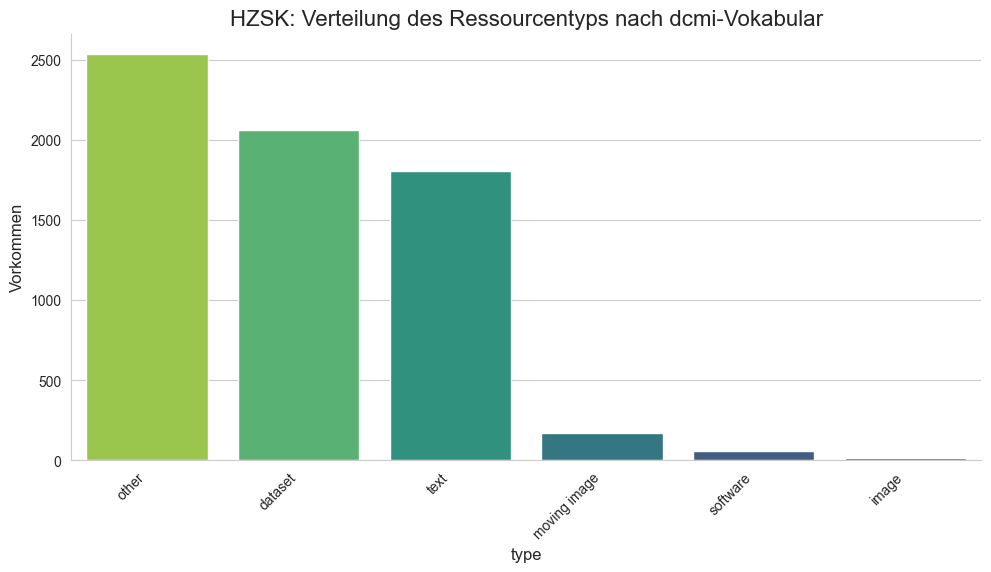

In [23]:


order_dcmi = data_hzsk['type - dcmi recommendation'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_hzsk['type - dcmi recommendation'] = pd.Categorical(data_hzsk['type - dcmi recommendation'], categories=order_dcmi, ordered=True)

sns.catplot(data_hzsk, x = 'type - dcmi recommendation', kind = 'count', aspect = 2, hue = 'type - dcmi recommendation', palette='viridis_r', legend=False)

plt.title('HZSK: Verteilung des Ressourcentyps nach dcmi-Vokabular', fontsize=16)
plt.xlabel('type', fontsize=12)
plt.ylabel('Vorkommen', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.savefig("HZSK_type_dcmi_catplot.png", dpi=600, bbox_inches='tight')
plt.show()

<a id="3"></a>
## 3. Word Clouds

[Zurück zum Anfang](#0)



### Titelbegriffe

[Zurück zum Anfang](#0)

{'Interview': 1.0, 'History': 0.914780292942743, 'CT volume': 0.170439414114514, 'Kombo': 0.1584553928095872, 'Account on': 0.15446071904127828, '3D Model': 0.14647137150466044, 'unstained CT': 0.13049267643142476, 'Data': 0.12383488681757657, 'Clan': 0.12383488681757657, 'Manuscript': 0.11451398135818908, 'Brikama': 0.1051930758988016, 'de': 0.09720372836218376, 'Conference Report': 0.09587217043941411, 'Project': 0.07456724367509987, 'Busumbala': 0.07456724367509987, 'on': 0.07323568575233022, 'Kaabu': 0.0692410119840213, 'Gunjur': 0.06657789613848203, '3D Scan': 0.06524633821571238, 'M': 0.06391478029294274, 'X Ray': 0.06391478029294274, 'Ray Fluorescence': 0.06258322237017311, 'rNying ma': 0.06125166444740346, 'ma rgyud': 0.06125166444740346, 'rgyud bum': 0.06125166444740346, 'bum Vol': 0.06125166444740346, 'Kundaa': 0.05992010652463382, 'with': 0.05858854860186418, 'Wuli': 0.05858854860186418, 'Pirang': 0.05858854860186418, 'Dataset': 0.0559254327563249, 'Temporal Model': 0.051930

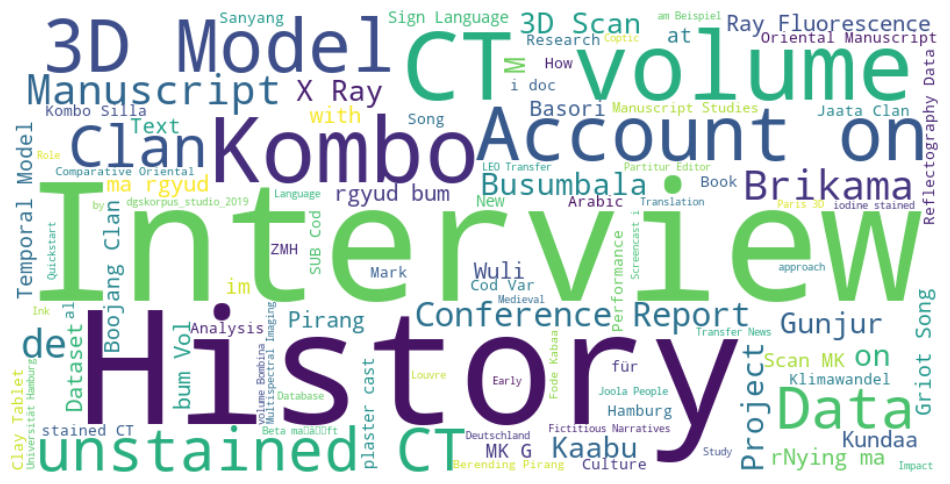

In [24]:

text_data = data_hzsk["title"].str.cat(sep=' ') # Werte werden als string zusammengefügt
stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 
'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'aus', 
'vor', 'nach', 'and', 'about', 'the', 'of', 'an', 'a', 'for', 'from', 'to']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100, stopwords = stopwords).generate(text_data) # Erstellung der Wordcloud mit collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("HZSK_title_wordcloud.png", dpi=600, bbox_inches='tight')
plt.show() # Anzeige der Wordcloud



### Urheber*innen

[Zurück zum Anfang](#0)

{'RDD': 1.0, 'NCAC': 0.9990766389658357, 'Thomas': 0.30932594644506, 'König': 0.26685133887349954, 'Hanke': 0.20867959372114497, 'Konrad': 0.1791320406278855, 'Gabriele': 0.17174515235457063, 'Reiner': 0.17082179132040629, 'Langer': 0.17082179132040629, 'Lutz': 0.15143120960295475, 'Alexander': 0.1440443213296399, 'Stefan': 0.14127423822714683, 'Susanne': 0.1348107109879963, 'Haas': 0.13204062788550322, 'Christian': 0.12742382271468145, 'Wagner': 0.11542012927054478, 'Nishio': 0.11172668513388735, 'Rie': 0.11172668513388735, 'Engelkes': 0.11080332409972299, 'Karolin': 0.11080332409972299, 'Hong': 0.10895660203139428, 'Sung': 0.10895660203139428, 'Eun': 0.10895660203139428, 'Silke': 0.1061865189289012, 'Rathmann': 0.1061865189289012, 'Sven': 0.10526315789473684, 'Matthes': 0.10433979686057249, 'Hofmann': 0.10341643582640812, 'Ilona': 0.10341643582640812, 'Blanck': 0.10249307479224377, 'Dolly': 0.10249307479224377, 'Jeziorski': 0.10064635272391505, 'Olga': 0.10064635272391505, 'Uta': 0.0

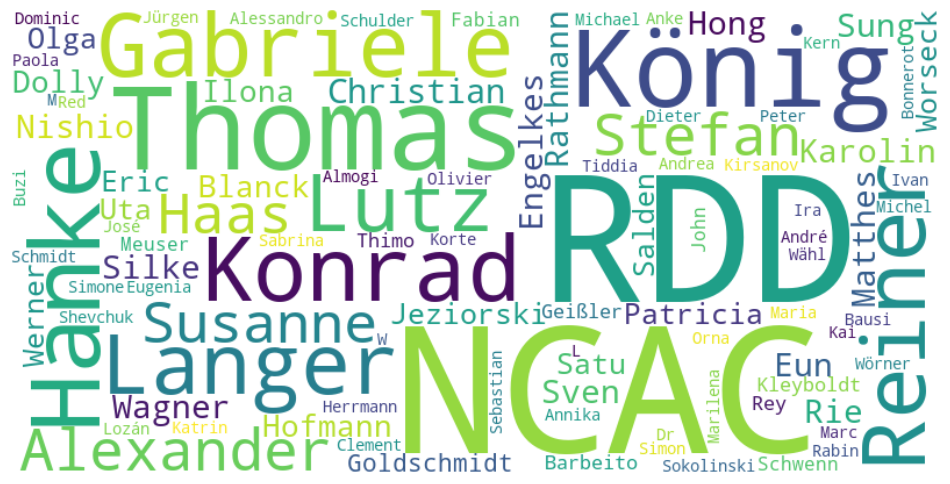

In [25]:

'Word Cloud aufgrund der Vielfalt der Personennamen schwer auszuwerten'

text_data = data_hzsk["creator"].str.cat(sep=' ') # Werte werden als string zusammengefügt
#stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'aus', 'vor', 'nach', 'and', 'about', 'the', 'of', 'an', 'a', 'for', 'from']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100, stopwords = stopwords, collocations=False).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("HZSK_Wordcloud_creator.png", dpi=600, bbox_inches='tight')
plt.show() # Anzeige der Wordcloud



### Mitwirkende

[Zurück zum Anfang](#0)

{'José': 1.0, 'L': 0.9845559845559846, 'Lozán': 0.9536679536679536, 'Breckle': 0.9498069498069498, 'Siegmar': 0.9498069498069498, 'W': 0.9498069498069498, 'Graßl': 0.9498069498069498, 'Hartmut': 0.9459459459459459, 'König': 0.9420849420849421, 'Dieter': 0.7876447876447876, 'Kasang': 0.7837837837837838, 'Thomas': 0.5791505791505791, 'Hanke': 0.5521235521235521, 'Konrad': 0.5521235521235521, 'Reiner': 0.5521235521235521, 'Langer': 0.5521235521235521, 'Gabriele': 0.5521235521235521, 'Lutz': 0.5521235521235521, 'Stefan': 0.47104247104247104, 'Boojang': 0.4594594594594595, 'Alhaji': 0.4362934362934363, 'Wagner': 0.43243243243243246, 'Christian': 0.4092664092664093, 'Susanne': 0.40540540540540543, 'Satu': 0.4015444015444015, 'Hofmann': 0.3938223938223938, 'Silke': 0.3938223938223938, 'mod': 0.38996138996138996, 'Barbeito': 0.38996138996138996, 'Rey': 0.38996138996138996, 'Geißler': 0.38996138996138996, 'Patricia': 0.38996138996138996, 'Blanck': 0.38996138996138996, 'Dolly': 0.389961389961389

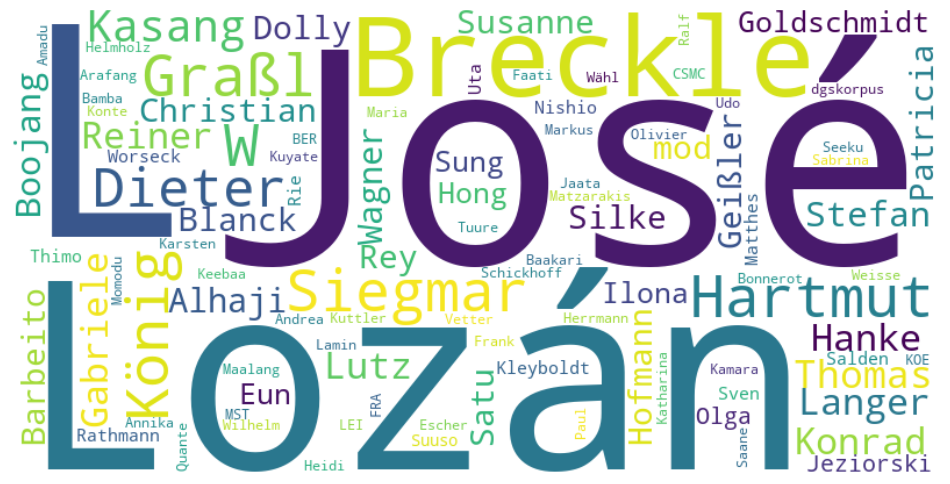

In [26]:
'Word Cloud aufgrund der Vielfalt der Personennamen schwer auszuwerten'

text_data = data_hzsk["contributor"].str.cat(sep=' ') # Werte werden als string zusammengefügt
#stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'aus', 'vor', 'nach', 'and', 'about', 'the', 'of', 'an', 'a', 'for', 'from']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100, stopwords = stopwords, collocations=False).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("HZSK_Wordcloud_contributor.png", dpi=600, bbox_inches='tight')
plt.show() # Anzeige der Wordcloud
##


### Quellen

[Zurück zum Anfang](#0)

{'Manuscript': 1.0, 'Studies': 0.9558011049723757, 'Comparative': 0.9502762430939227, 'Oriental': 0.9502762430939227, 'Bulletin': 0.6933701657458563, 'Newsletter': 0.2569060773480663, 'January': 0.143646408839779, 'July': 0.11602209944751381, 'Proceedings': 0.04696132596685083, 'February': 0.04696132596685083, 'Workshop': 0.04419889502762431, 'Linking': 0.04419889502762431, 'Coptic': 0.04419889502762431, 'Ethiopian': 0.04419889502762431, 'Syriac': 0.04419889502762431, 'Domain': 0.04419889502762431, 'Present': 0.04419889502762431, 'Future': 0.04419889502762431, 'Synergy': 0.04419889502762431, 'Strategies': 0.04419889502762431, 'Hamburg': 0.04419889502762431, 'Journal': 0.013812154696132596, 'Management': 0.008287292817679558, 'Research': 0.008287292817679558, 'für': 0.008287292817679558, 'Ecology': 0.0055248618784530384, 'Evolution': 0.0055248618784530384, 'Cultures': 0.0055248618784530384, 'Business': 0.0055248618784530384, 'Zeitschrift': 0.0055248618784530384, 'Papyrologie': 0.0055248

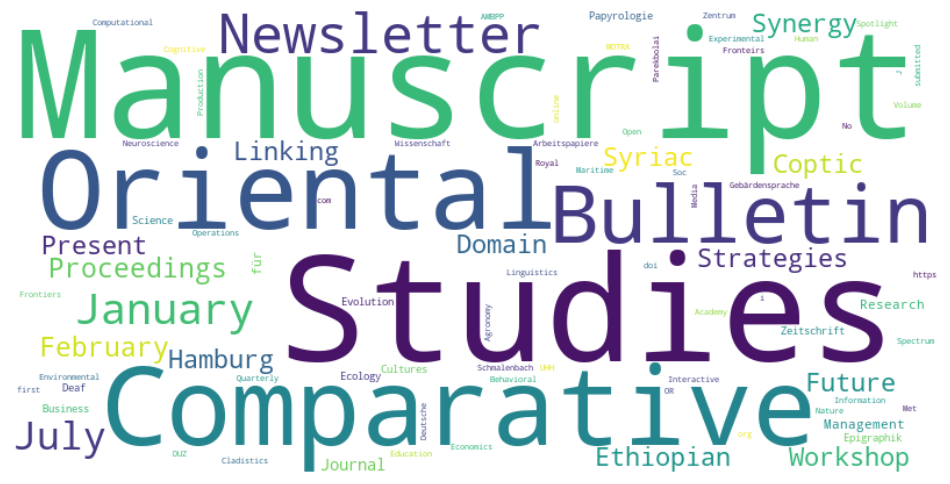

In [27]:
text_data = data_hzsk["source"].str.cat(sep=' ') # Werte werden als string zusammengefügt
#stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'aus', 'vor', 'nach', 'and', 'about', 'the', 'of', 'an', 'a', 'for', 'from']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100, stopwords = stopwords, collocations=False).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud



### Thema der Ressource

[Zurück zum Anfang](#0)

{'manuscript studies': 1.0, 'open questions': 0.8559322033898306, 'written artefacts': 0.8516949152542372, 'consent open': 0.7923728813559322, '3d model': 0.7584745762711864, '3d scan': 0.6864406779661016, 'century ce': 0.6610169491525424, 'dfg ha2323': 0.6016949152542372, 'frog amphibia': 0.597457627118644, 'anura frog': 0.5847457627118644, 'amphibia computed': 0.538135593220339, 'computed tomography': 0.538135593220339, 'tomography ct': 0.538135593220339, 'model 3d': 0.4957627118644068, 'csmc uwa': 0.4703389830508475, 'procedures': 0.4279661016949153, 'project dfg': 0.4279661016949153, 'sign names': 0.4279661016949153, 'deaf individuals': 0.4279661016949153, 'calender task': 0.4279661016949153, 'what did': 0.4279661016949153, 'did you': 0.4279661016949153, 'you do': 0.4279661016949153, 'do when': 0.4279661016949153, 'when it': 0.4279661016949153, 'it happened': 0.4279661016949153, 'free conversation': 0.4279661016949153, 'isolated signs': 0.4279661016949153, 'prohibition signs': 0.42

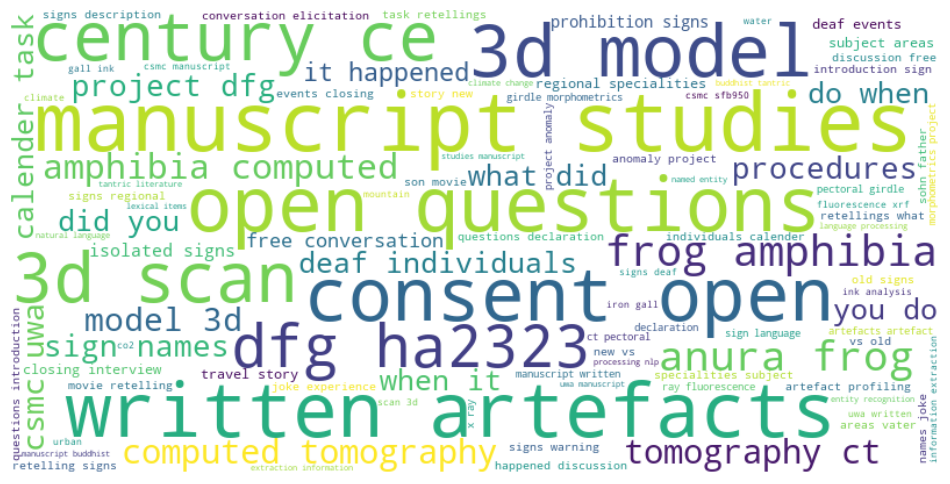

In [28]:
text_data = data_hzsk["subject"].str.cat(sep=' ') # Werte werden als string zusammengefügt
#stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'aus', 'vor', 'nach', 'and', 'about', 'the', 'of', 'an', 'a', 'for', 'from']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100, stopwords = stopwords, collocations=True).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud



### Beschreibung der Ressource

[Zurück zum Anfang](#0)

{'DGS Korpus': 1.0, 'mov 1080i25': 0.7332396627860297, 'frontal view': 0.5453633079084705, 'Panasonic camera': 0.5234845443596949, 'camera DGS': 0.5032115616218387, 'informant B': 0.42914492171818547, 'stereoscopic frontal': 0.36571657968687277, 'left channel': 0.27739863508631074, 'right channel': 0.27739863508631074, 'total view': 0.2553191489361702, 'view with': 0.2553191489361702, 'right informant': 0.2553191489361702, 'B moderator': 0.2553191489361702, 'moderator informant': 0.2553191489361702, 'informant': 0.2525090325170614, 'mov 720p50': 0.2460859092733842, 'Alternative name': 0.19470092332396627, 'with': 0.18366118024889602, 'bird s': 0.17723805700521877, 's eye': 0.17723805700521877, 'eye view': 0.17723805700521877, 'B Panasonic': 0.17382577278201525, 'stereoscopic total': 0.17382577278201525, 'i': 0.10939381774387796, 'actor standing': 0.10638297872340426, 'by': 0.0981533520674428, 'that': 0.09714973906061823, 'at': 0.09554395824969891, 'on actor': 0.09112806101967082, '1080

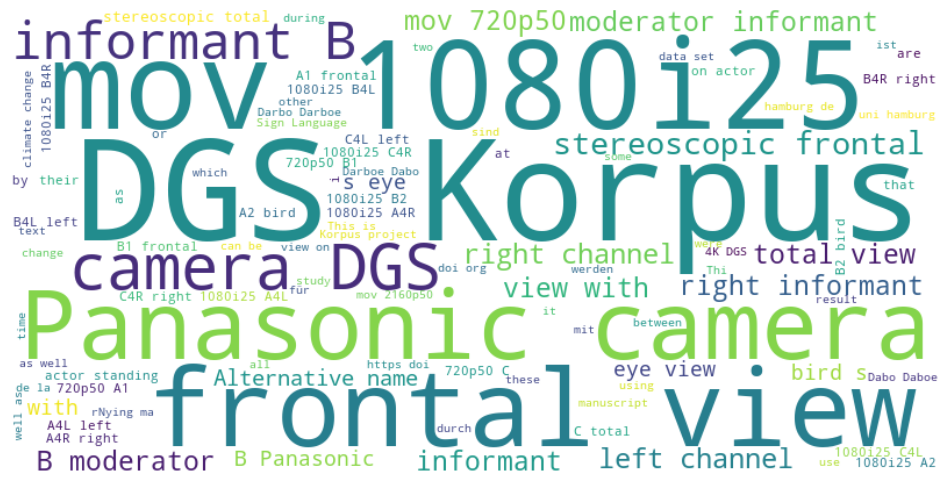

In [29]:
text_data = data_hzsk["description"].str.cat(sep=' ') # Werte werden als string zusammengefügt
#stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'aus', 'vor', 'nach', 'and', 'about', 'the', 'of', 'an', 'a', 'for', 'from']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100, stopwords = stopwords, collocations=True).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("HZSK_Wordcloud_description.png", dpi=600, bbox_inches='tight')
plt.show() # Anzeige der Wordcloud
